## Import Libraries

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import psycopg2
import config
import pandas.io.sql as psql
import pandas as pd

## Database Connection

In [2]:
CONN = psycopg2.connect(host=config.DB_HOST,
                        database=config.DB_NAME,
                        user=config.DB_USER,
                        password=config.DB_PASS)

In [4]:
print("Database opened successfully")
CURSOR = CONN.cursor()

Database opened successfully


## TOP 10 stocks traded on April 5th

In [9]:
SQL1 = "select key, count(*) \
        from stocksdata \
        where date(time)='2021-03-05' \
        group by key order by count(*) DESC limit 10;"

In [10]:
CURSOR.execute(SQL1)
result = CURSOR.fetchall()

In [13]:
print(result)

[('MSFT', 30157), ('INTC', 29731), ('MU', 29056), ('NVDA', 28956), ('MRVL', 28198), ('JD', 26663), ('MDLZ', 26258), ('OPEN', 25149), ('NNDM', 24678), ('KHC', 24616)]


## CALCULATING CORRELATION

In [27]:
SQL2 = "select key,last_price, time \
        from stocksdata \
        where date(time)='2021-04-03' and key in ('GOOG') \
        and last_price is NOT NULL"

SQL3 = "select key,last_price, time \
        from stocksdata \
        where date(time)='2021-04-03' and key in ('MSFT') \
        and last_price is NOT NULL"

In [82]:
df1 = psql.read_sql(SQL2, CONN)

In [83]:
df2 = psql.read_sql(SQL3, CONN)

In [40]:
col1=df1['last_price']
col2=df2['last_price']
correlation = col1.corr(col2)
print(correlation)

-0.2986393099711733


## AAPL Closing Prices

In [48]:
aapl = pd.read_csv("aapl.csv")

In [65]:
aapl

timestamp        time  last_price
0      1617025815918  2021-03-29    122.2910
1      1617025814325  2021-03-29    122.2695
2      1617025814893  2021-03-29    122.2700
3      1617025815411  2021-03-29    122.3000
4      1617025816468  2021-03-29    122.2750
...              ...         ...         ...
57364  1617307838351  2021-04-01    122.9102
57365  1617307838867  2021-04-01    122.9200
57366  1617307839402  2021-04-01    122.9180
57367  1617307834111  2021-04-01    122.8950
57368  1617307834657  2021-04-01    122.9000

[57369 rows x 3 columns]

In [64]:
aapl['time']=pd.to_datetime(aapl['time']).apply(lambda x: x.date())

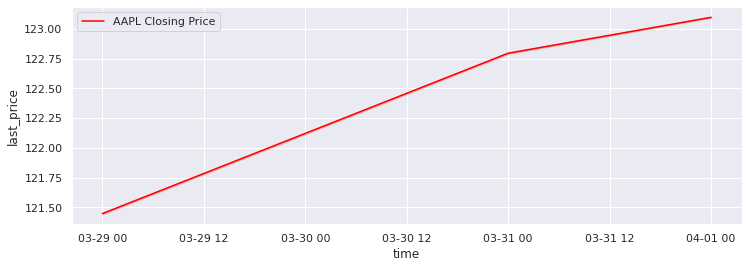

In [66]:
sns.set(rc={'figure.figsize':(12,4)})
ax = sns.lineplot(x='time',y='last_price', data = aapl, label='AAPL Closing Price', color='red')

## Trying to calculate standard deviation in one go for couple of symbols

In [67]:
SQL4= "SELECT timestamp, last_price, stddev(last_price) \
        OVER (ORDER BY timestamp ASC ROWS 24 PRECEDING) \
        FROM stocksdata WHERE key in ('FB', 'GOOG','MSFT') ORDER BY key;"


In [68]:
CURSOR.execute(SQL4)
result1 = CURSOR.fetchall()

In [69]:
print(result1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## AAPL Average price

In [70]:
stddev=aapl.std()

In [72]:
print(stddev)

timestamp     9.604134e+07
last_price    7.431754e-01
dtype: float64


In [77]:
print("Average AAPL price is: ", np.average(aapl['last_price']))

Average AAPL price is:  122.64858287053984


## AAPL Mean price

In [80]:
print("Mean AAPL price is: ", np.mean(aapl['last_price']))

Mean AAPL price is:  122.64858287053984


## AAPL Variance 

In [78]:
print("Variance is : ", np.var(aapl['last_price']))

Variance is :  0.5522999979622598


## AAPL Standard Deviation 

In [79]:
print("Standard Deviation is : ", np.std(aapl['last_price']))

Standard Deviation is :  0.7431688892588681
